# Статистический анализ данных на примере сервиса аренды самокатов.

В нашем распоряжении данные популярного сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках и подписках. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться без подписки или с подпиской Ultra.  
Задача проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

**План работы.**  
   
  1. Открыть файлы с данными о пользователях, их поездках и подписках, изучить общую информацию о них.  

  
  2. Выполнить предобработку данных:
     
    - Привести столбец `date` к типу даты pandas.   
    - Создать новый столбец с номером месяца на основе столбца `date`.
    - Проверить наличие пропущенных значений и дубликатов в датафреймах. Обработать их, если такие значения присутствуют.  
    - Рассмотреть типы данных в каждом столбце: найти столбцы, в которых нужно изменить тип данных, преобразовать тип данных в выбранных столбцах.  
    - Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты.   
    
  
  4. Провести исследовательский анализ данных:   
    Описать и визуализировать общую информацию о пользователях и поездках:
    - частота встречаемости городов;  
    - соотношение пользователей с подпиской и без подписки;  
    - возраст пользователей;  
    - расстояние, которое пользователь преодолел за одну поездку;  
    - продолжительность поездок.    
    
  
  5. Объединить данные:  
    - о пользователях, поездках и подписках в один датафрейм;  
    - создать ещё два датафрейма из датафрейма, созданного на предыдущем этапе: c данными о пользователях без подписки и данными о пользователях с подпиской;  
    - визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий.  
    
  
  6. Найти суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.  
  Подсчитать выручку, которую принес каждый пользователь помесячно.   

  
  7. Проверить гипотезы:  
    7.1 Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.   
    7.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?   
    7.3 Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.  
    7.4 Произойдет ли значимое снижение количества обращений в техподдержку после обновления серверов, с которыми взаимодействует мобильное приложение. Выяснить, какой тест понадобился бы для проверки этой гипотезы?  
      
8. 8.1 Выяснить, какое минимальное количество промокодов нужно разослать по акции с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку, чтобы вероятность не выполнить план была примерно 5%.  Подбрать параметры распределения, описывающего эту ситуацию, построить график распределения и сформулируйте ответ на вопрос о количестве промокодов.   
      8.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построить примерный график распределения и оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.  
      
    
9. Сформулировать общий вывод.

## Загрузка данных

In [2]:
# импортируем библиотеки 
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st
from scipy.stats import binom, norm
from math import factorial
from math import sqrt

In [3]:
# Считываем данные из csv-файла в датафреймов и сохраняем в переменные 'users', 'rides', 'subscriptions'. 
# Пути к файлам: /datasets/users_go.csv ; /datasets/rides_go.csv ; /datasets/subscriptions_go.csv
try:
    users = pd.read_csv('/datasets/users_go.csv')#, sep=',')
    rides = pd.read_csv('/datasets/rides_go.csv')
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv', sep=',')
    rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
    subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

In [4]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [5]:
users.tail()

,user_id,name,age,city,subscription_type
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra
1564,1045,Артемий,28,Ростов-на-Дону,free


*Основная информация о датафрейме users:*

In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [7]:
rides.head(15)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


*Основная информация о датафрейме rides:*

In [8]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [9]:
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


*Основная информация о датафрейме subscriptions:*

In [10]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


## Предобработка данных

In [11]:
# Заменим тип данных в столбце 'date' с 'object'на 'datetime64' 
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [12]:
rides.dtypes  # Выведем информацию о типах данных в таблице `rides`

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

In [13]:
# Выведем уникальные значения года в столбце 'date', чтобы выяснить, за какой период предоставлены данные
rides['date'].dt.year.unique()

array([2021])

Исходная таблица `rides` содержит данные только за 2021 год, поэтому их можно объединить по месяцам.

In [14]:
# Создадим новый столбец 'month' с номером месяца на основе столбца 'date'.
rides['month'] = rides['date'].dt.month

Проверим количество пропущенных значений для каждого столбца датафреймов users и rides

In [15]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [16]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Проверим количество строк-дубликатов в данных.

In [17]:
# Проверим количество строк-дубликатов в таблице 'users'. 
users.duplicated().sum()

31

In [18]:
# Удалим строки-дубликаты в таблице 'users'.
users = users.drop_duplicates()

In [19]:
users.duplicated().sum()  # убедимся в отсутствии явных дубликатов в таблице 'users'

0

In [20]:
# Проверим количество строк-дубликатов в таблице 'rides'. 
rides.duplicated().sum()

0

Изучим уникальные значения в столбцах `name` и `city` таблицы `users` и проверим наличие неявных дубликатов.

In [21]:
# Отсортируем перечень уникальных значений в столбце 'name' по алфавиту 
sorted(users['name'].unique())  

['Агата',
 'Аделина',
 'Адель',
 'Айдар',
 'Александр',
 'Александра',
 'Алексей',
 'Алина',
 'Алиса',
 'Алия',
 'Алла',
 'Альберт',
 'Альбина',
 'Алёна',
 'Амалия',
 'Амина',
 'Амир',
 'Анастасия',
 'Анатолий',
 'Ангелина',
 'Андрей',
 'Анжелика',
 'Анна',
 'Антон',
 'Антонина',
 'Ариана',
 'Арина',
 'Арсен',
 'Арсений',
 'Артемий',
 'Артур',
 'Артём',
 'Богдан',
 'Борис',
 'Вадим',
 'Валентина',
 'Валерий',
 'Валерия',
 'Варвара',
 'Василий',
 'Василина',
 'Василиса',
 'Вера',
 'Вероника',
 'Виктор',
 'Виктория',
 'Виолетта',
 'Виталий',
 'Виталина',
 'Влад',
 'Влада',
 'Владимир',
 'Владислав',
 'Владислава',
 'Всеволод',
 'Вячеслав',
 'Галина',
 'Георгий',
 'Герман',
 'Глеб',
 'Гордей',
 'Григорий',
 'Давид',
 'Дамир',
 'Даниил',
 'Данил',
 'Данила',
 'Даниэль',
 'Дарина',
 'Дарья',
 'Демид',
 'Денис',
 'Диана',
 'Дмитрий',
 'Ева',
 'Евгений',
 'Евгения',
 'Егор',
 'Екатерина',
 'Елена',
 'Елизавета',
 'Елисей',
 'Есения',
 'Жанна',
 'Зарина',
 'Захар',
 'Злата',
 'Иван',
 'Игнат',

In [22]:
# Отсортируем перечень уникальных значений в столбце 'city' по алфавиту 
sorted(users['city'].unique())  

['Екатеринбург',
 'Краснодар',
 'Москва',
 'Омск',
 'Пятигорск',
 'Ростов-на-Дону',
 'Сочи',
 'Тюмень']

Неявных дубликатов не обнаружено.

***После предобработки данных названия всех столбцов датафрейма записаны в едином стиле, пропуски в данных отсутствуют, устранены дубликаты в таблице `users`. В таблицу `rides` добавлен столбец `month` с номером месяца на основе столбца `date`.***

## Исследовательский анализ данных

Изучим общую информацию о пользователях и поездках.

***3.1 Частота встречаемости городов.***

In [23]:
# Сформируем сводную таблицу по количеству пользователей по городам, сортируя по убыванию количества пользователей
city_rating = users.pivot_table(index = 'city', values = ['user_id'], aggfunc = 'count'
).sort_values(by='user_id', ascending=False)
city_rating

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


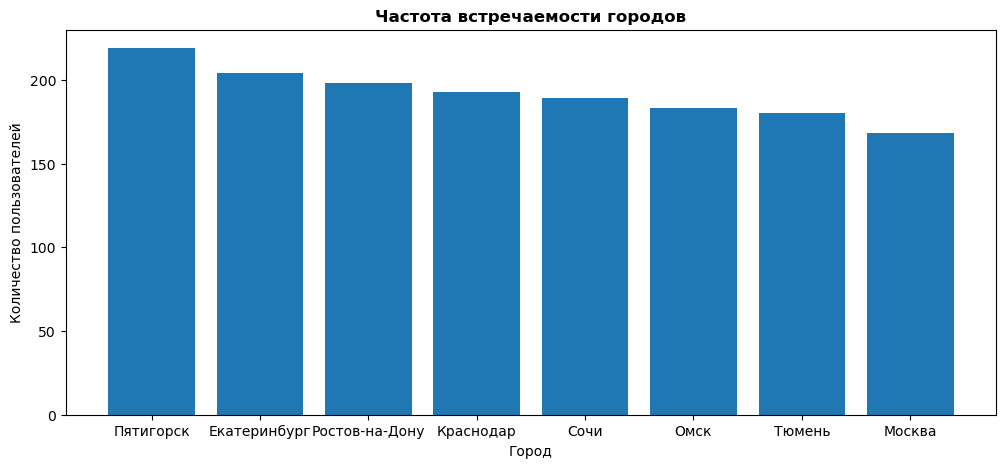

In [24]:
# строим гистограмму для столбца 'city' таблицы 'users'
plt.figure(figsize=(12,5))
plt.bar(city_rating.index, city_rating['user_id'])
plt.title('Частота встречаемости городов', fontsize=12, fontweight="bold")
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.show()

По имеющимся данным аренда самокатов наиболее востребована в Пятигорске, однако количество поездок в Пятигорске незначительно превышает аналогичный показатель по другим городам. Меньше всего поездок совершено в Москве (168). По остальным городам данные распределены с незначительным отклонением в диапазоне от 183 до 204. 

***3.2 Соотношение пользователей с подпиской и без подписки.***

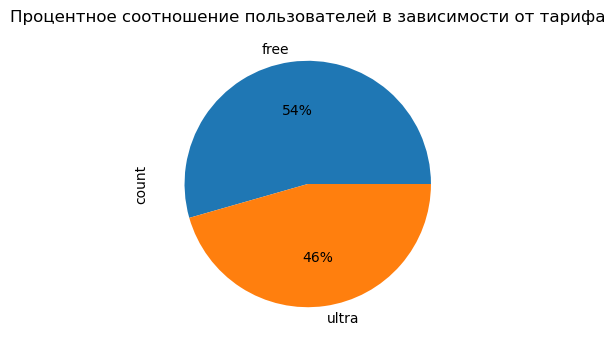

In [25]:
# строим круговую диаграмму для столбца 'subscription_type' таблицы 'users'
users['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = 'subscription_type', 
    autopct = '%1.0f%%', 
    figsize=(4,4),
    title = 'Процентное соотношение пользователей в зависимости от тарифа');

Соотношение пользователей с подпиской и без подписки незначительно отклоняется в сторону пользователей без подписки.  
54% всех поездок совершено без подписки.

***3.3 Возраст пользователей.***

In [26]:
# Изучим числовое описание столбца 'age' в таблице 'users' для определения параметров построения гистограммы
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

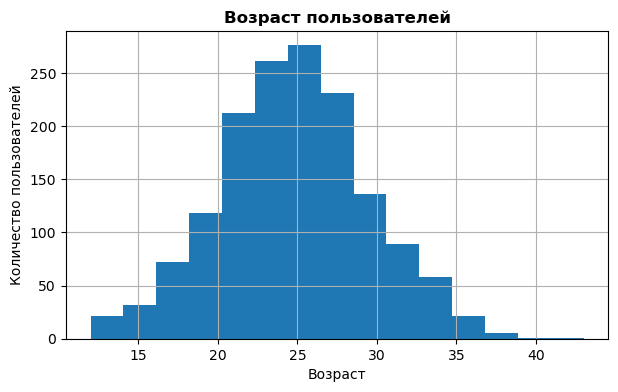

In [27]:
# Cтроим гистограмму для столбца 'age' таблицы 'users'
plt.figure(figsize=(7,4))
plt.hist(users['age'], bins = 15, range=(12, 43))
plt.title('Возраст пользователей', fontsize=12, fontweight="bold")
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [28]:
# Bыясним количество пользователей, лидирующих по числу поездок, по возрастам
users['age'].value_counts().head(10)

age
25    145
24    132
26    131
23    129
22    119
27    119
28    112
21     93
20     71
30     68
Name: count, dtype: int64

Распределение возраста пользователей близко к нормальному. Самые активные пользователи 22 - 28 лет. Медиана (25 лет) практически совпадает со средним значением. 

***3.4 Расстояние, которое пользователь преодолел за одну поездку.***

In [29]:
# Изучим числовое описание столбца 'distance' в таблице 'rides' 
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

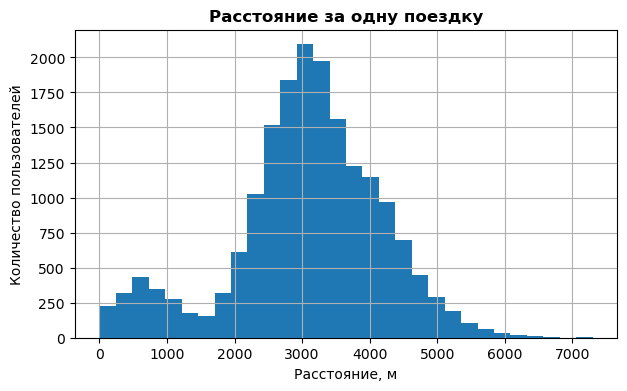

In [30]:
# Cтроим гистограмму для столбца 'distance' таблицы 'rides'
plt.figure(figsize=(7,4))
plt.hist(rides['distance'], bins = 30, range=(0, 7300))
plt.title('Расстояние за одну поездку', fontsize=12, fontweight="bold")
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Гистограмма расстояния имеет два пика: правый характерен для среднего расстояния 3134 м (медиана), левый для расстояния примерно 600 м. 

***3.5 Продолжительность поездок.***

In [31]:
# Изучим числовое описание столбца 'duration' в таблице 'rides' 
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

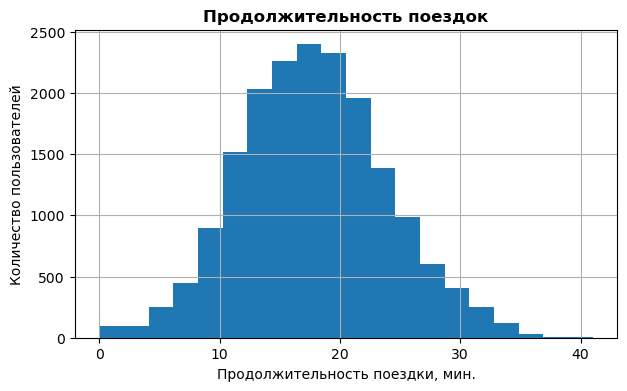

In [32]:
# Cтроим гистограмму для столбца 'duration' таблицы 'rides'
plt.figure(figsize=(7,4))
plt.hist(rides['duration'], bins = 20, range=(0, 41))
plt.title('Продолжительность поездок', fontsize=12, fontweight="bold")
plt.xlabel('Продолжительность поездки, мин.')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Минимальная продолжительность поездки 0,5 минуты. Выясним какие поездки длились до 1 минуты, чтобы убедиться, короткие ли это поездки или какие-то сбои логирования.   

In [33]:
# Сформируем срез данных таблицы rides по времения меньше 2 минут и отсортируем его по убыванию расстояния
min_duration = rides.query('duration <= 2.0').sort_values(by = 'distance', ascending = False)
min_duration

,user_id,distance,duration,date,month
16309,1411,7211.007745,0.5,2021-04-15,4
17242,1477,6724.932981,0.5,2021-01-12,1
11385,1057,6601.197575,0.5,2021-02-07,2
13701,1224,6414.516026,0.5,2021-07-15,7
14574,1285,6316.574814,0.5,2021-09-25,9
...,...,...,...,...,...
14342,1268,4177.139336,0.5,2021-06-09,6
9698,937,4169.066800,0.5,2021-12-12,12
10692,1006,4106.278268,0.5,2021-10-31,10
17909,1524,4103.998874,0.5,2021-06-18,6


In [34]:
# Выведем уникальные значения столбца 'duration' таблицы 'min_duration'
min_duration['duration'].unique()

array([0.5])

In [35]:
# Вычислим количество строк, в которых время поездки равно 0.5 мин.
rides.query('duration == 0.5')['user_id'].count()

95

In [36]:
# Доля строк, в которых время поездки равно 0.5 мин.
rides.query('duration == 0.5')['user_id'].count() / rides['duration'].count()

0.005257914545052026

Все поездки меньше 2 минут зафиксированы как 0,5 мин. В то же время, расстояние, пройденное за это время варьируется от 4030 м до 7211 м. Скорость самоката должна быть в этом случае 240 м/с, что нереально.   
Поездки продолжительностью 0.5 минут, вероятно, сбои логирования. Их доля от общего количества меньше 1%.   

Среднее значение и медиана близки к 18 минутам (17.8 и 17.7 соответственно). Продолжительность большей части поездок находится в диапазоне от 13 до 22 минут. 

***Вывод:*** Наиболее типично использование самокатов для поездок на расстояние 3 км со средним временем использования 18 минут.  Самые активные пользователи 22 - 28 лет, что вполне объяснимо наличием собственных средств для оптимизации передвижения.   
Большинство пользователей пользуются арендой самоката без подписки.   
Наибольшее количество поездок совершается в городах с наиболее продолжительным теплым временем года (Пятигорск, Краснодар, Сочи), однако различие по территориальному признаку незначительно.

## Объединение данных

***4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм `data_total`.*** 

In [37]:
# Объединим методом merge() данные из таблиц 'users', 'rides' и 'subscriptions'
data_total = users.merge(rides) 
data_total = data_total.merge(subscriptions) 

In [38]:
# Заменим значения в столбце 'duration' на значения, округленные в большую сторону
data_total['duration'] = np.ceil(data_total['duration'])

In [39]:
data_total

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


In [40]:
# Проверим, что после соединения таблиц не возникли пропуски 
data_total.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [41]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


После объединения таблиц пропусков не возникло, размер таблицы соответствует ожиданиям.

***4.2 Создадим два датафрейма `data_ultra` и `data_free` из датафрейма `data_total`:   
  c данными о пользователях без подписки и с данными о пользователях с подпиской.***

In [42]:
# в таблице 'data_ultra' сохраним срез данных таблицы 'data' по значению 'ultra' столбца 'subscription_type'
data_ultra = data_total.query('subscription_type == "ultra"')

In [43]:
data_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


In [44]:
# в таблице 'data_free' сохраним срез данных таблицы 'data_total' по значению 'free' столбца 'subscription_type'
data_free = data_total.query('subscription_type == "free"')

In [45]:
data_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18.0,2021-02-14,2,8,50,0


***4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.***

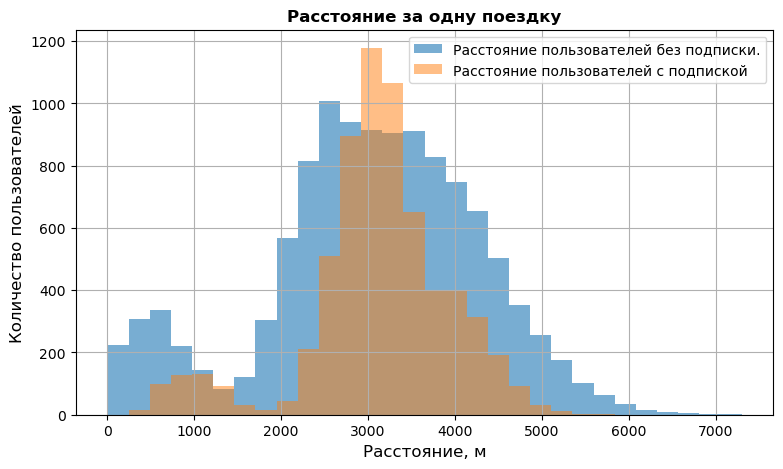

In [46]:
# построим в одной системе координат гистограмму для data_ultra['distance']  в сравнении с data_free['distance']
plt.figure(figsize=(9,5))
ax = data_free['distance'].plot(
    kind='hist', 
    y='distance', 
    range=(0, 7300),
    bins=30, 
    linewidth=5,
    alpha=0.6, 
    label='Расстояние пользователей без подписки.',
    legend=True
)
data_ultra['distance'].plot(
    kind='hist', 
    y='distance', 
    range=(0, 7300), 
    bins=30, 
    linewidth=5, 
    alpha=0.5, 
    label='Расстояние пользователей с подпиской',
    ax=ax, 
    grid=True, 
    legend=True)
plt.title('Расстояние за одну поездку', fontsize=12, fontweight="bold")
plt.xlabel('Расстояние, м', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(True)
plt.show()

Пользователи с подпиской чаще всего передвигаются на расстояние от 2500 м до 3600 м.  
Пользователей без подписки, передвигающихся на самокате на расстояние больше 3 км, больше, чем пользователей с подпиской. Большинство пользователей без подписки передвигаются на расстояние от 2000 м до 4500 м.

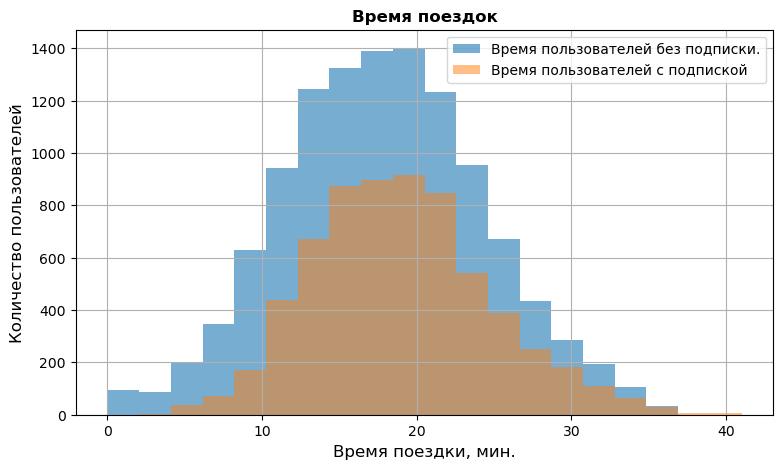

In [47]:
# построим в одной системе координат гистограмму для data_ultra['distance']  в сравнении с data_free['distance']
plt.figure(figsize=(9,5))
ax = data_free['duration'].plot(
    kind='hist', 
    y='distance', 
    range=(0, 41),
    bins=20, 
    linewidth=5,
    alpha=0.6, 
    label='Время пользователей без подписки.',
    legend=True
)
data_ultra['duration'].plot(
    kind='hist', 
    y='distance', 
    range=(0, 41), 
    bins=20, 
    linewidth=5, 
    alpha=0.5, 
    label='Время пользователей с подпиской',
    ax=ax, 
    grid=True, 
    legend=True)
plt.title('Время поездок', fontsize=12, fontweight="bold")
plt.xlabel('Время поездки, мин.', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(True)
plt.show()

In [48]:
# Изучим числовое описание столбца 'duration' в таблице 'data_ultra' 
data_ultra['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

In [49]:
# Изучим числовое описание столбца 'duration' в таблице 'data_free' 
data_free['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

Пользователи с подпиской в среднем тратят на поездку на 1 мин. больше, чем пользователи без подписки.   
У пользователей с подпиской время использования самоката находиться в промежутке от 3.8 до 40.8 минут, в то время, как аналогичный показатель у пользователей без подписки составляет от 2 до 34.9 минут (Поездки продолжительностья 0.5 минут вероятно сбои логирования). 

***Вывод:***   
Объединили данные о пользователях, поездках и подписках в один датафрейм `data_total` и создали на его основе два датафрейма:  
- `data_ultra` с данными о пользователях с подпиской;  
- `data_free` с данными о пользователях без подписки.  

Визуализировали информацию о расстоянии и времени поездок для пользователей каждой категории.  
  
Пользователи с подпиской совершают более длительные поездки и проезжают в среднем 3 км. Пользователи без подписки стараются минимизировать время использования самоката, но расстояние преодолевают большее, тем самым увеличивая скорость передвижения, что может представлять угрозу для остальных участников дорожного движения.

## Подсчёт выручки

In [50]:
# Сформируем сводную таблицу с агрегированными данными о поездках каждого пользователя 
# на основе датафрейма 'data_total' с объединёнными данными
data_counting = data_total.pivot_table(
    index=['user_id', 'month'], 
    values=['name', 'distance','duration', 'subscription_type'], 
    aggfunc={'name' : 'count', 'distance': 'sum', 'duration' : 'sum', 'subscription_type' : 'min'})

In [51]:
# Переименуем столбец 'name' в 'trips' - поездки
data_counting = data_counting.rename(columns = {'name' : 'trips' })

In [52]:
data_counting.head(20)

distance  duration  trips subscription_type
user_id month                                                 
1       1       7027.511294      42.0      2             ultra
        4        754.159807       7.0      1             ultra
        8       6723.470560      46.0      2             ultra
        10      5809.911100      32.0      2             ultra
        11      7003.499363      56.0      3             ultra
        12      6751.629942      28.0      2             ultra
2       3      10187.723006      63.0      3             ultra
        4       6164.381824      40.0      2             ultra
        6       3255.338202      14.0      1             ultra
        7       6780.722964      48.0      2             ultra
        8        923.007439       7.0      1             ultra
        10      2824.636598      19.0      1             ultra
        12      3828.248580      12.0      1             ultra
3       1       3061.777147      13.0      1             ultra
        2       5421.152016      39.0      2             ultra
        4       2956.651632      21.0      1             ultra
        5       9064.026918      63.0      3             ultra
        7      10919.595403      67.0      3             ultra
        9       2891.012822      23.0      1             ultra
        12      2593.381928      13.0      1             ultra

In [53]:
# Создаем функцию 'money', которая по типу подписки вычисляет выручку
def money(row):
    if row['subscription_type'] == 'ultra':
        return row['duration'] * 6 + 199
    elif row['subscription_type'] == 'free':
        return row['duration'] * 8 + row['trips'] * 50
    else:
        return 'Тип подписки не определен'

In [54]:
# Добавляем столбец 'month_money' с помесячной выручкой, которую принёс каждый пользователь
data_counting['month_money'] = data_counting.apply(money, axis=1)

In [55]:
data_counting

distance  duration  trips subscription_type  month_money
user_id month                                                              
1       1       7027.511294      42.0      2             ultra        451.0
        4        754.159807       7.0      1             ultra        241.0
        8       6723.470560      46.0      2             ultra        475.0
        10      5809.911100      32.0      2             ultra        391.0
        11      7003.499363      56.0      3             ultra        535.0
...                     ...       ...    ...               ...          ...
1534    6       3409.468534      26.0      2              free        308.0
        8       7622.453034      48.0      2              free        484.0
        9       4928.173852      23.0      1              free        234.0
        11     13350.015305      78.0      4              free        824.0
        12      2371.711192      16.0      1              free        178.0

[11331 rows x 5 columns]

***Вывод:***   
Создали сводную таблицу с агрегированными данными о поездках каждого пользователя на основе датафрейма 'data_total' с объединёнными данными.   
Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.  
Добавили столбец для подсчета выручки, которую принес каждый пользователь помесячно.

## Проверка гипотез

***6.1  Гипотеза 1: пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.***  
Если да, то пользователи с подпиской могут быть «выгоднее» для компании.   

H0: Время поездок пользователей с подпиской `ultra` равно времени поездок пользователей без подписки `free`  
H1 (правосторонняя альтернативная гипотеза): Время поездок пользователей с подпиской `ultra` больше времени поездок пользователей без подписки `free`  
  
Уровень статистической значимости `alpfa` = 0.05 (5%)  

`data_ultra['duration']` и `data_free['duration']` не зависящие друг от друга совокупности, поэтому воспользуемся двухвыборочным t-тестом для независимых выборок. 

In [56]:
print('Cреднее время поездок пользователей с подпиской:', data_ultra['duration'].mean()) 
print('Cреднее время поездок пользователей без подписки:', data_free['duration'].mean())

alpfa = .05  # уровень статистической значимости 5%

results = st.ttest_ind(
    data_ultra['duration'], 
    data_free['duration'], 
    alternative = 'greater')

print('p-значение:', results.pvalue)

# вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpfa:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

Cреднее время поездок пользователей с подпиской: 19.037692307692307
Cреднее время поездок пользователей без подписки: 17.890992392807746
p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу.


***Вывод:*** Проведя статистический тест, мы отвергли нулевую гипотезу о том, что время поездок пользователей с подпиской равно времени поездок пользователей без подписки. Следовательно, верна альтернативная гипотеза: время поездок пользователей с подпиской ultra больше времени поездок пользователей без подписки free. Эта гипотеза подтверждается и реальными средними рассматриваемых совокупностей. Среднее время поездок пользователей с подпиской 18.5 мин., а среднее время поездок пользователей без подписки 17.4 мин.  

***Гипотеза 1 верна: пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки, и могут быть «выгоднее» для компании.***

***6.2 Гипотеза 2: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130 метров.***  
Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката.   

H0: Расстояние, которое проезжают пользователи с подпиской равно 3130 м.  
H1 (правосторонняя альтернативная гипотеза): Расстояние пользователей с подпиской `ultra` больше 3130 м.
  
Уровень статистической значимости `alpfa` = 0.05 (5%)  

Рассматриваем одну совокупность `data_ultra['distance']`, поэтому воспользуемся одновыборочным t-тестом. 

In [57]:
print('Cреднее расстояние пользователей с подпиской:', data_ultra['distance'].mean()) 

value = 3130  # расстояние, соответствие которому будем проверять
alpfa = .05  # уровень статистической значимости 5%

results = st.ttest_1samp(
    data_ultra['distance'], value,  
    alternative = 'greater')

print('p-значение:', results.pvalue)

# вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpfa:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не отвергаем нулевую гипотезу.')

Cреднее расстояние пользователей с подпиской: 3115.4453880370247
p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу.


***Вывод:*** Проведя статистический тест, мы не смогли отвергнуть нулевую гипотезу о том, что пользователи с подпиской проезжают 3130 метров. Однако невозможно точно утверждать, что среднее расстояние пользователей с подпиской равно 3130 м.   
Выясним долю пользователей с подпиской, которые проезжают расстояние более 3130 м. 

In [58]:
# Вычислим долю пользователей с подпиской, для которых 'distance' больше 3130 м.
data_ultra.query('distance > 3130')['distance'].count() / data_ultra['distance'].count()

0.5153846153846153

Большая часть пользователей с подпиской (51,5%) преодолевают на самокате расстояние больше 3130 метров.   

***Гипотеза 2 не подтверждается:  среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не меньше 3130 метров.***


***6.3 Гипотеза 3: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.***  

H0: Помесячная выручка `month_money` пользователей с подпиской `ultra` равна помесячной выручке `month_money` пользователей без подписки `free`.   

H1 (правосторонняя альтернативная гипотеза): Помесячная выручка `month_money` пользователей с подпиской `ultra` больше помесячной выручки `month_money` пользователей без подписки `free`.

Уровень статистической значимости alpfa = 0.05 (5%)

In [59]:
# Выберем из стоблца 'month_money' таблицы 'data_counting' данные о пользователях с подпиской 'ultra'
month_money_ultra = data_counting.query('subscription_type == "ultra"')['month_money']
# Выберем из стоблца 'month_money' таблицы 'data_counting' данные о пользователях без подписки 'free'
month_money_free = data_counting.query('subscription_type == "free"')['month_money']

`month_money_ultra` и `month_money_free` не зависящие друг от друга совокупности, поэтому воспользуемся двухвыборочным t-тестом для независимых выборок. 

In [60]:
print('Cреднее ежемесячная выручка пользователей с подпиской:', month_money_ultra.mean()) 
print('Cреднее ежемесячная выручка пользователей без подписки:', month_money_free.mean())

alpfa = .05  # уровень статистической значимости 5%

results = st.ttest_ind(
    month_money_ultra, 
    month_money_free, 
    alternative = 'greater')

print('p-значение:', results.pvalue)

# вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpfa:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

Cреднее ежемесячная выручка пользователей с подпиской: 362.7921906022502
Cреднее ежемесячная выручка пользователей без подписки: 328.6413651073845
p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу.


***Вывод:*** Проведя статистический тест, мы отвергли нулевую гипотезу о том, что помесячная выручка пользователей с подпиской равна помесячной выручке пользователей без подписки. Следовательно, верна альтернативная гипотеза: выручка пользователей с подпиской больше помесячной выручки пользователей без подписки. Эта гипотеза подтверждается и реальными средними рассматриваемых совокупностей. Средняя ежемесячная выручка пользователей с подпиской 361.48 руб., а пользователей без подписки 325.84 руб.  

***Гипотеза 3 верна: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.***

***6.4 Гипотеза 4:*** Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого ***количество обращений в техподдержку значимо снизилось.*** Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.   
***Выяснить, какой тест понадобился бы для проверки этой гипотезы?***

Проверяется гипотеза о равенстве среднего значения генеральной совокупности до и после изменения.   
Так как рассматривается набор данных до и после изменения, то выборки являются зависимыми, следовательно для проверки этой гипотезы понадобиться ***двухвыборочный t-тест для зависимых выборок***, метод `scipy.stats.ttest_rel()`. 

H0: Среднее значение количества обращений в техподдержку до обновления равно среднему значению количества обращений после обновления.  
    
H1 (правосторонняя альтернативная гипотеза): Среднее значение количества обращений в техподдержку до обновления больше среднего значения количества обращений после обновления. 

## Распределения

***7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.  
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей.   
Выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Подобрать параметры распределения, описывающего эту ситуацию, построить график распределения и сформулировать ответ на вопрос о количестве промокодов.***

Случайная величина распределена биномиально, если:  
- Проводится фиксированное число попыток n (в нашем случае фиксированное число клиентов, которым будут разосланы промокоды);  
- Каждая попытка — простой эксперимент Бернулли ровно с двумя исходами (оформит подписку - не оформит подписку;  
- Вероятность успеха p одинакова для всех n попыток (10%);  
- Попытки независимы между собой (решение каждогоклиента независти от решения другого).  

Следовательно можно сделать вывод о том, что эту ***ситуацию описывает биномиальное распределение***. 

In [61]:
# Выясним общее количество клиентов сервиса GoFast
clients = len(users['user_id'].unique())
clients

1534

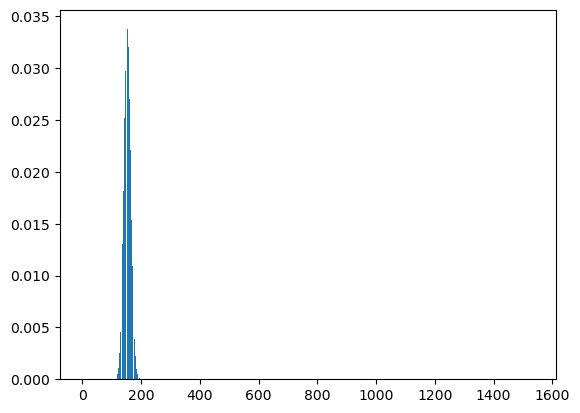

In [62]:
n = 1534 # количество попыток
p = 0.1 # вероятность успеха

distr = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
    
plt.bar(range(0, n + 1), distr);

При вероятности успеха 10% из 1535 испытаний мы получим от 100 до 200 успехов. 

Выzсним, можно ли получить хорошую аппроксимацию данного биномиального распределения нормальным.  
  
*Условие хорошей аппроксимации:  
Нужно взять промежуток от математического ожидания биномиального распределения плюс-минус три его стандартных отклонения. Если он лежит в пределах [0,n] (то есть там, где биномиальное распределение определено), то его форма будет симметрична и близка к нормальному распределению.*
  
Выясним, выполняется ли условие хорошей аппроксимации нормальным распределением.

In [63]:
n = 1534 # количество попыток
p = 0.1 # вероятность успеха

mu_binom = n * p  # мат.ожидание биномиального распределения 
print('Математическое ожидание биномиального распределения:', mu_binom)

sigma_binom = sqrt(n * p * (1 - p))  # ст.отклонение биномиального распределения
print('Стандартное отклонение биномиального распределения:', sigma_binom)

left = round(mu_binom - 3 * sigma_binom, 1)  # левая граница промежутка
right= round(mu_binom + 3 * sigma_binom, 1)  # правая граница промежутка

print('Промежуток от математического ожидания плюс-минус три его стандартных отклонения [', left, ',', right, ']') 

# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (left >= 0) and (right <= n):
    print('Условие хорошей аппроксимации выполняется.')
else:
    print('Условие не выполняется.')

Математическое ожидание биномиального распределения: 153.4
Стандартное отклонение биномиального распределения: 11.749893616539683
Промежуток от математического ожидания плюс-минус три его стандартных отклонения [ 118.2 , 188.6 ]
Условие хорошей аппроксимации выполняется.


Построим график биномиального и нормального распределения.

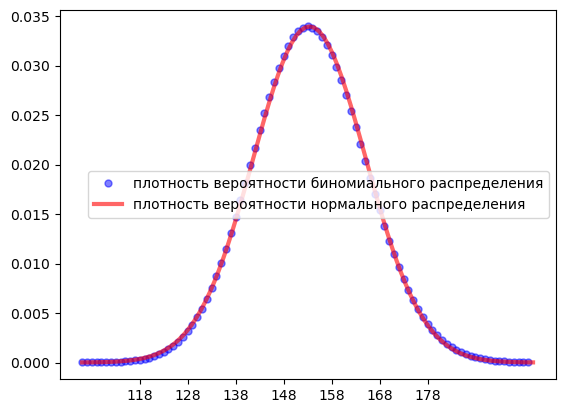

In [64]:
# задаём параметры биномиального распределения
n = 1534
p = 0.1

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5, прозрачность 0.5
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, alpha=0.5, label='плотность вероятности биномиального распределения')

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = mu_binom
sigma = sigma_binom
 
# зададим функцию, которая выдаёт <num> чисел, равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result

# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 3 и прозрачности 0.6
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.6, label='плотность вероятности нормального распределения')
 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 10))
ax.set_xticks(x_ticks)

# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.show()

Если промокоды разослать всем пользователям, и после бесплатного пробного периода подписку продлевают 10% пользователей, какова вероятность получить менее 100 успехов? 

In [65]:
# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 100
result = distr.cdf(99)
result

1.829837797456514e-06

Вероятность не выполнить план слишком мала. Требуется скорректировать количество разсылаемых промокодов.   
Нужное количество лежит в интервале от 100 до n = 1534.   
  
Подберем оптимальное значение n, чтобы вероятность не выполнить план была примерно 5%. 

In [66]:
n = 1534
p = 0.1
best_n = 100  # оптимальное значение n
min_dif = 0.001  # предел разности реальной вероятности и 0.05
best_probability = 0  # оптимальное значение вероятности
    
for i in range(100, n):
    mu = i * p  # математическое ожидание
    sigma = sqrt(i * p * (1 - p))  # стандартное отклонение 
    distr = st.norm(mu, sigma)  # задаём нормальное распределение
    result = distr.cdf(99) # считаем вероятность хвоста слева от 100
    
    if abs(result - 0.05) < min_dif:
        best_n = i
        min_dif = abs(result - 0.05)
        best_probability = result
        
print('При n =', best_n, 'вероятность не выполнить план', best_probability)

При n = 1158 вероятность не выполнить план 0.04991937389843044


In [67]:
#Код ревьюера

st.binom(2, 0.5).cdf(1)

0.75

In [68]:
n = 1534
p = 0.1
best_n = 100  # оптимальное значение n
min_dif = 0.001  # предел разности реальной вероятности и 0.05
best_probability = 0  # оптимальное значение вероятности
    
for i in range(100, n):
    distr = st.binom(i, p)  # задаём биномиальное распределение
    result = distr.cdf(99) # считаем вероятность хвоста слева от 100
    
    if abs(result - 0.05) < min_dif:
        best_n = i
        min_dif = abs(result - 0.05)
        best_probability = result
        
print('При n =', best_n, 'вероятность не выполнить план', best_probability)

При n = 1161 вероятность не выполнить план 0.049760900949902404


***Вывод: 1161 промокод нужно разослать, чтобы вероятность того, что подписку продлят менее 100 пользователей была примерно равна 5% (4.98%).***

***7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений.   
С помощью аппроксимации построить примерный график распределения и оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.***

Данную ситуацию также описывает биномиальное распределение. Т.к. количество экспериментов достаточно велико, то его можно аппроксимировать нормальным распределением. Построим примерный график биномиального и нормального распределения. 

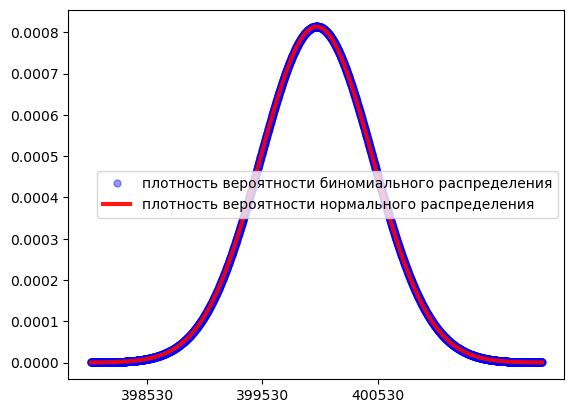

In [69]:
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

mu_binom = n * p  # мат.ожидание биномиального распределения 
sigma_binom = sqrt(n * p * (1 - p))  # ст.отклонение биномиального распределения

# границы промежутка, в котором будем строить аппроксимацию 
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))

# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5, прозрачность 0.4
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, alpha=0.4, label='плотность вероятности биномиального распределения')

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = mu_binom
sigma = sigma_binom

# зададим функцию, которая выдаёт <num> чисел, равномерно распределённых от <start> до <stop>
# (для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result

# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 3 и прозрачности 0.9
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.9, label='плотность вероятности нормального распределения')
 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1000))
ax.set_xticks(x_ticks)

# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.show()

Оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей, т.е. какова вероятность получить менее 399500 успехов.

In [70]:
distr = st.norm(mu, sigma)  # задаём нормальное распределение
result = distr.cdf(399500)  # считаем вероятность хвоста слева от 399500
result

0.15371708296369768

***Вывод: вероятность того, что из 1 млн уведомлений пользователи откроют не более 399,5 тыс. составляет 15,4%***

## Общий вывод. 

**Целью данного проекта** был анализ данных по аренде самокатов и проверка гипотез, которые помогут бизнесу вырасти.

**Входные данные от популярного сервиса аренды самокатов GoFast** — данные о некоторых пользователях из нескольких городов, а также об их поездках и подписках. 

**1. Открыты файлы с данными** о пользователях, их поездках и подписках, изучена общая информация о них.  

**2. Проведена предобработка данных**:
   После предобработки данных названия всех столбцов датафрейма записаны в едином стиле, пропуски в данных отсутствуют, устранены дубликаты в таблице users. В таблицу rides добавлен столбец month с номером месяца на основе столбца date.

**3. Проведен исследовательский анализ данных.**   
    Описана и визуализирована общая информация о пользователях и поездках:  
        - частота встречаемости городов;  
    - соотношение пользователей с подпиской и без подписки;  
    - возраст пользователей;  
    - расстояние, которое пользователь преодолел за одну поездку;  
    - продолжительность поездок.   
    
Вывод: *Наиболее типично использование самокатов для поездок на расстояние 3 км со средним временем использования 18 минут.  
Самые активные пользователи 22 - 28 лет, что вполне объяснимо наличием собственных средств для оптимизации передвижения.  
Большинство пользователей пользуются арендой самоката без подписки.  
Наибольшее количество поездок совершается в городах с наиболее продолжительным теплым временем года (Пятигорск, Краснодар, Сочи), однако различие по территориальному признаку незначительно.*

**4. Объединили данные о пользователях, поездках и подписках**  
Визуализировали информацию о расстоянии и времени поездок для пользователей каждой категории.

Вывод: *Пользователи с подпиской совершают более длительные поездки и проезжают в среднем 3 км.   
Пользователи без подписки стараются минимизировать время использования самоката, но расстояние преодолевают большее, тем самым увеличивая скорость передвижения, что может представлять угрозу для остальных участников дорожного движения.*
    
    
**5. Создали сводную таблицу с агрегированными данными о поездках каждого пользователя.**  
Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.  
Добавили столбец для подсчета выручки, которую принес каждый пользователь помесячно. 


**6. Проверили гипотезы:**  

   ***6.1 Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.***   
   
   Вывод: пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки, и могут быть «выгоднее» для компании.  
    *Проведя статистический тест, мы отвергли нулевую гипотезу о том, что время поездок пользователей с подпиской равно времени поездок пользователей без подписки. Следовательно, верна альтернативная гипотеза: время поездок пользователей с подпиской ultra больше времени поездок пользователей без подписки free. Эта гипотеза подтверждается и реальными средними рассматриваемых совокупностей. Среднее время поездок пользователей с подпиской 18.5 мин., а среднее время поездок пользователей без подписки 17.4 мин.*

   ***6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?***  
   
   Вывод: Гипотеза не подтверждается: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не меньше 3130 метров.   
   *Проведя статистический тест, мы не смогли отвергнуть нулевую гипотезу о том, что пользователи с подпиской проезжают 3130 метров. Это означает, что невозможно точно утверждать, что среднее расстояние пользователей с подпиской меньше 3130 м.  
   Большая часть пользователей с подпиской (51,5%) преодолевают на самокате расстояние больше 3130 метров.*

   ***6.3 Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.***    
   
   Вывод: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.  
   *Проведя статистический тест, мы отвергли нулевую гипотезу о том, что помесячная выручка пользователей с подпиской равна помесячной выручке пользователей без подписки. Следовательно, верна альтернативная гипотеза: выручка пользователей с подпиской больше помесячной выручки пользователей без подписки. Эта гипотеза подтверждается и реальными средними рассматриваемых совокупностей. Средняя ежемесячная выручка пользователей с подпиской 361.48 руб., а пользователей без подписки 325.84 руб.*

   ***6.4 Произойдет ли значимое снижение количества обращений в техподдержку после обновления серверов, с которыми взаимодействует мобильное приложение. Выяснить, какой тест понадобился бы для проверки этой гипотезы?***    
   
   Вывод: понадобиться двухвыборочный t-тест для зависимых выборок.

**7. Распределения**    

   ***7.1*** Выяснили, какое минимальное количество промокодов нужно разослать по акции с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку, чтобы вероятность не выполнить план была примерно 5%.  Подбрать параметры распределения, описывающего эту ситуацию, построить график распределения и сформулируйте ответ на вопрос о количестве промокодов.   
    
   **1161 промокодов нужно разослать, чтобы вероятность того, что подписку продлят менее 100 пользователей была примерно равна 5% (4.98%).**
    

   ***7.2*** Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построили примерный график распределения и оценили вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.    
   
   **Вероятность того, что из 1 млн уведомлений пользователи откроют не более 399,5 тыс. составляет 15,4%**
      

**Рекомендации.**  

✔️Портрет идеального клиента: Пользователь 22 - 28 лет, пользующийся подпиской и за одну поездку преодолевающий расстояние не более 3 км.  

Для увеличения выручки компании следует увеличивать долю клиентов, пользующихся подпиской.   
В этих целях можно проводить акции с раздачей промокодов на бесплатный месяц подписки. 
